# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | lorengau
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | mednogorsk
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | al muwayh
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | mukah
City not found. Skipping...
Processing Record 15 of Set 1 | mahdia
Processing Record 16 of Set 1 | maracaibo
Processing Record 17 of Set 1 | tillaberi
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | chaohu
Process

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.44,89,89,2.68,CL,1684037174
1,lorengau,-2.0226,147.2712,30.27,65,13,2.43,PG,1684037175
2,avarua,-21.2078,-159.7750,23.03,94,75,2.06,CK,1684037176
3,wailua homesteads,22.0669,-159.3780,24.24,86,100,5.14,US,1684037176
4,adamstown,-25.0660,-130.1015,23.22,72,100,8.94,PN,1684037177


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.44,89,89,2.68,CL,1684037174
1,lorengau,-2.0226,147.2712,30.27,65,13,2.43,PG,1684037175
2,avarua,-21.2078,-159.7750,23.03,94,75,2.06,CK,1684037176
3,wailua homesteads,22.0669,-159.3780,24.24,86,100,5.14,US,1684037176
4,adamstown,-25.0660,-130.1015,23.22,72,100,8.94,PN,1684037177


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

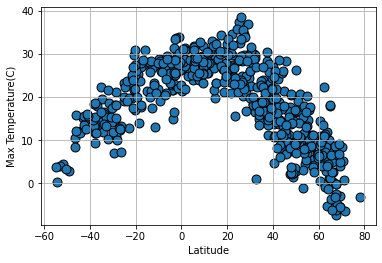

<Figure size 720x576 with 0 Axes>

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black', s=80)
plt.title= ('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid()
plt.figure(figsize=(10,8))
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

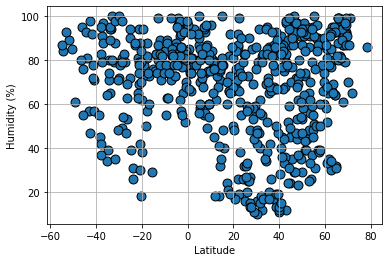

<Figure size 720x576 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black', s=80)
plt.title= ('City Max Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.figure(figsize=(10,8))
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

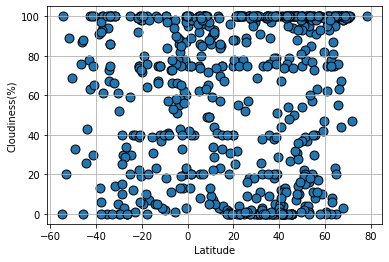

<Figure size 720x576 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black', s=80)
plt.title= ('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid()
plt.figure(figsize=(10,8))
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

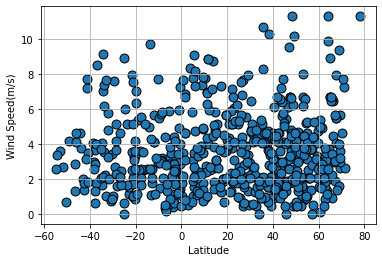

<Figure size 720x576 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black', s=80)
plt.title= ("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel('Wind Speed(m/s)')
plt.xlabel('Latitude')
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linearReg(x_values, y_values, x_p,y_p):
    (slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    plt.figure(figsize=(10,8))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_equation, xy=(x_p,y_p), fontsize=20, color="red")
    print(f'The r-value is: {rvalue}')

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,wailua homesteads,22.0669,-159.3780,24.24,86,100,5.14,US,1684037176
6,qaqortoq,60.7167,-46.0333,0.56,85,100,0.13,GL,1684037179
8,mednogorsk,51.4128,57.5950,10.64,73,4,1.97,RU,1684037180
10,al muwayh,22.4333,41.7583,27.52,19,4,1.79,SA,1684037181
12,ust-nera,64.5667,143.2000,1.32,64,95,1.98,RU,1684037183


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.44,89,89,2.68,CL,1684037174
1,lorengau,-2.0226,147.2712,30.27,65,13,2.43,PG,1684037175
2,avarua,-21.2078,-159.7750,23.03,94,75,2.06,CK,1684037176
4,adamstown,-25.0660,-130.1015,23.22,72,100,8.94,PN,1684037177
5,punta arenas,-53.1500,-70.9167,3.95,93,20,3.60,CL,1684037178


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8346016461211955


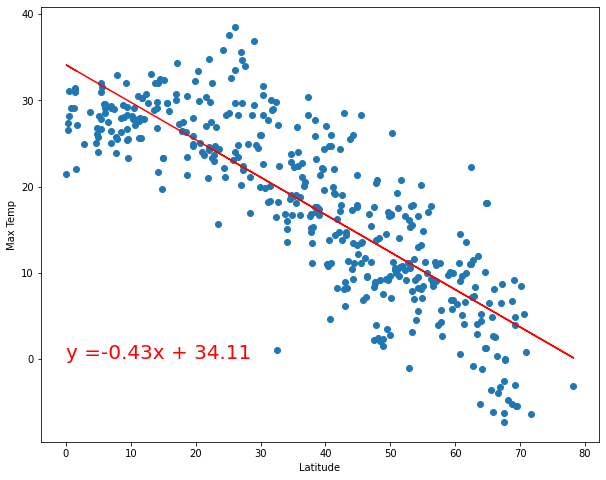

In [18]:
# Linear regression on Northern Hemisphere
linearReg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],0,0)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.7998965587522614


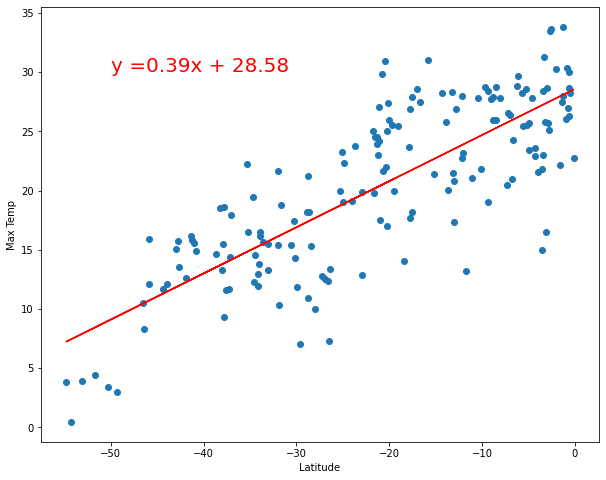

In [19]:
# Linear regression on Southern Hemisphere
linearReg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],-50,30)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09310634901662314


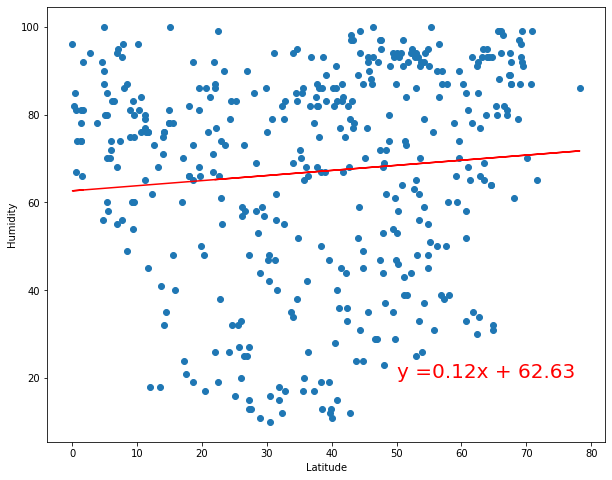

In [20]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],50,20)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.11057900510947699


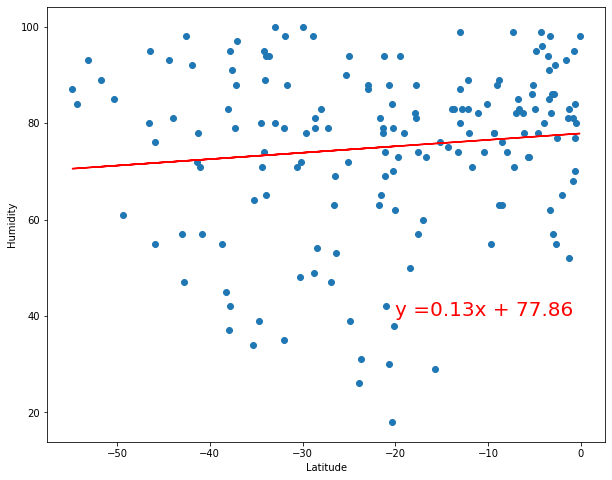

In [21]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -20, 40)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09619012924352147


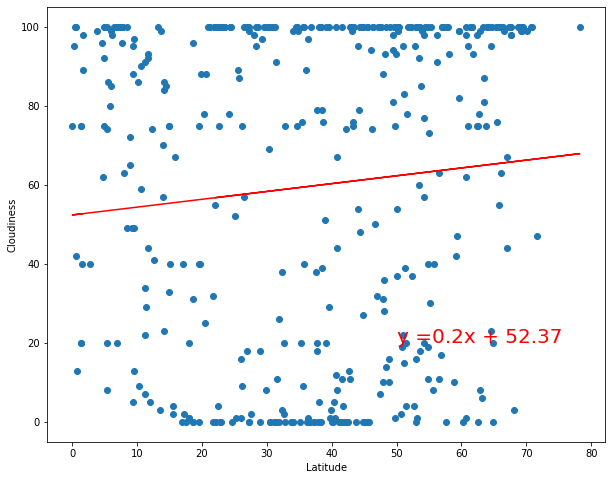

In [22]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 50,20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.0044004683181320045


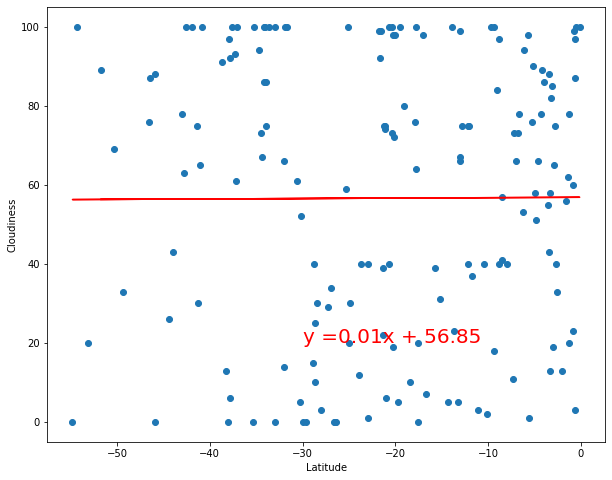

In [23]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],-30,20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012974170212364782


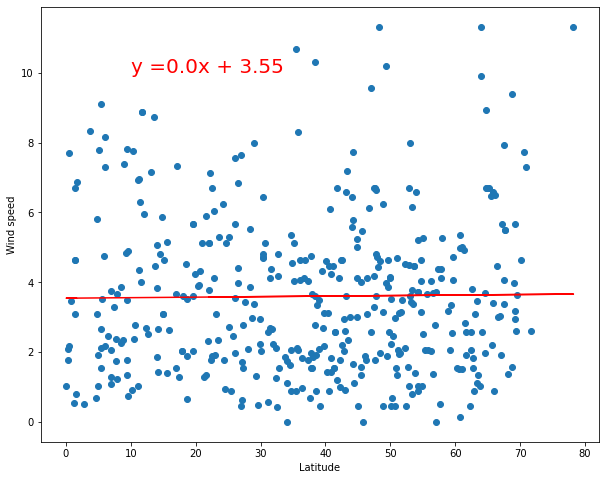

In [24]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],10,10)
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.show()

The r-value is: -0.11181580007625382


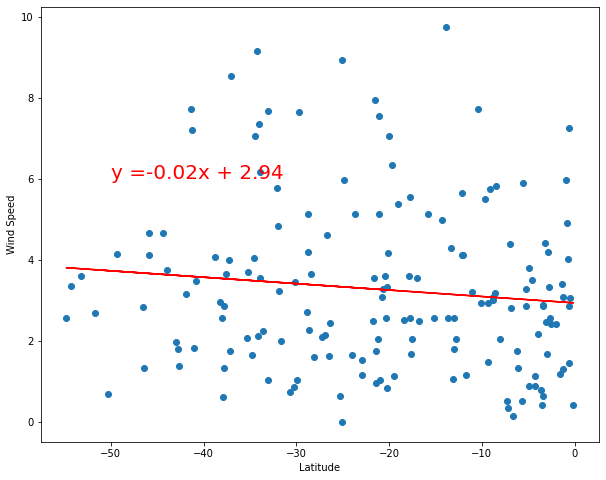

In [25]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],-50,6)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE